### Joris

In [1]:
import pandas as pd
import matplotlib.pyplot as plt	
import seaborn as sns
import os
import glob
from pykalman import KalmanFilter
import numpy as np
import matplotlib.ticker as ticker

In [2]:
def plot_sensor_data(sensor_data_dict, time_col="Time (s)", dpi=300,
                              palette=["#FF5733", "#33FF57", "#3357FF"], linewidth=1):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.ticker as ticker

    sns.set(style="whitegrid", context="talk", font_scale=2.2)  # doubled font scale
    num_plots = len(sensor_data_dict)
    
    fig, axs = plt.subplots(num_plots, 1, figsize=(18, 5 * num_plots), sharex=True, dpi=dpi)
    if num_plots == 1:
        axs = [axs]

    for ax, (label, df) in zip(axs, sensor_data_dict.items()):
        if time_col not in df.columns:
            continue

        df_long = df.melt(id_vars=[time_col], var_name="Sensor Axis", value_name="Value")

        sns.set_palette(palette)
        sns.lineplot(data=df_long, x=time_col, y="Value", hue="Sensor Axis", ax=ax, linewidth=linewidth)

        ax.set_title(label, weight='bold', fontsize=28)  # doubled
        ax.set_ylabel("Value", fontsize=20)              # doubled
        ax.grid(False)

        # Legend outside
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])
        ax.legend(
            title="Axis",
            loc='center left',
            bbox_to_anchor=(1.01, 0.5),
            fontsize='medium',         # bigger
            title_fontsize='large'     # bigger
        )

        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:g}'))

    axs[-1].set_xlabel("Time (s)", weight='bold', fontsize=20)  # doubled
    
    plt.tight_layout()
    plt.show()


Joris

In [3]:
metro_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Accelerometer.csv")
metro_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Barometer.csv")
metro_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Gyroscope.csv")
metro_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Linear Accelerometer.csv")
metro_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Location.csv")
metro_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Magnetometer.csv")
metro_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Proximity.csv")

In [4]:
sensor_data_dict_metro_2 = {
    "Accelerometer": metro_accelerometer_df_2,
    "Gyroscope": metro_gyroscope_df_2,
    "Linear Accelerometer": metro_linear_accelerometer_df_2,
    "Magnetometer": metro_magnetometer_df_2,
    "Barometer": metro_barometer_df_2,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}


In [5]:
# plot_sensor_data(sensor_data_dict_metro_2)

In [6]:
accelerometer_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Accelerometer.csv")
barometer_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Barometer.csv")
gyroscope_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Gyroscope.csv")
linear_accelerometer_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Linear Accelerometer.csv")
location_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Location.csv")
magnetometer_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Magnetometer.csv")
proximity_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Proximity.csv")

In [7]:
sensor_data_dict_fietsen_2 = {
    "Accelerometer": accelerometer_df_fietsen_2,
    "Gyroscope": gyroscope_df_fietsen_2,
    "Linear Accelerometer": linear_accelerometer_df_fietsen_2,
    "Magnetometer": magnetometer_df_fietsen_2,
    "Barometer": barometer_df_fietsen_2
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

In [8]:
# plot_sensor_data(sensor_data_dict_fietsen_2)

In [9]:
# auto_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Accelerometer.csv")
# auto_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Barometer.csv")
# auto_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Gyroscope.csv")
# auto_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Linear Accelerometer.csv")
# auto_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Location.csv")
# auto_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Magnetometer.csv")
# auto_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Proximity.csv")

In [10]:
# sensor_data_dict_auto_2 = {
#     "Accelerometer": auto_accelerometer_df_2,
#     "Gyroscope": auto_gyroscope_df_2,
#     "Linear Accelerometer": auto_linear_accelerometer_df_2,
#     "Magnetometer": auto_magnetometer_df_2,
#     "Barometer": auto_barometer_df_2,
#     # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
# }



In [11]:
auto_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Accelerometer.csv")
auto_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Barometer.csv")
auto_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Gyroscope.csv")
auto_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Linear Accelerometer.csv")
auto_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Location.csv")
auto_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Magnetometer.csv")
auto_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Proximity.csv")

In [12]:
sensor_data_dict_auto_2 = {
    "Accelerometer": auto_accelerometer_df_2,
    "Gyroscope": auto_gyroscope_df_2,
    "Linear Accelerometer": auto_linear_accelerometer_df_2,
    "Magnetometer": auto_magnetometer_df_2,
    "Barometer": auto_barometer_df_2,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

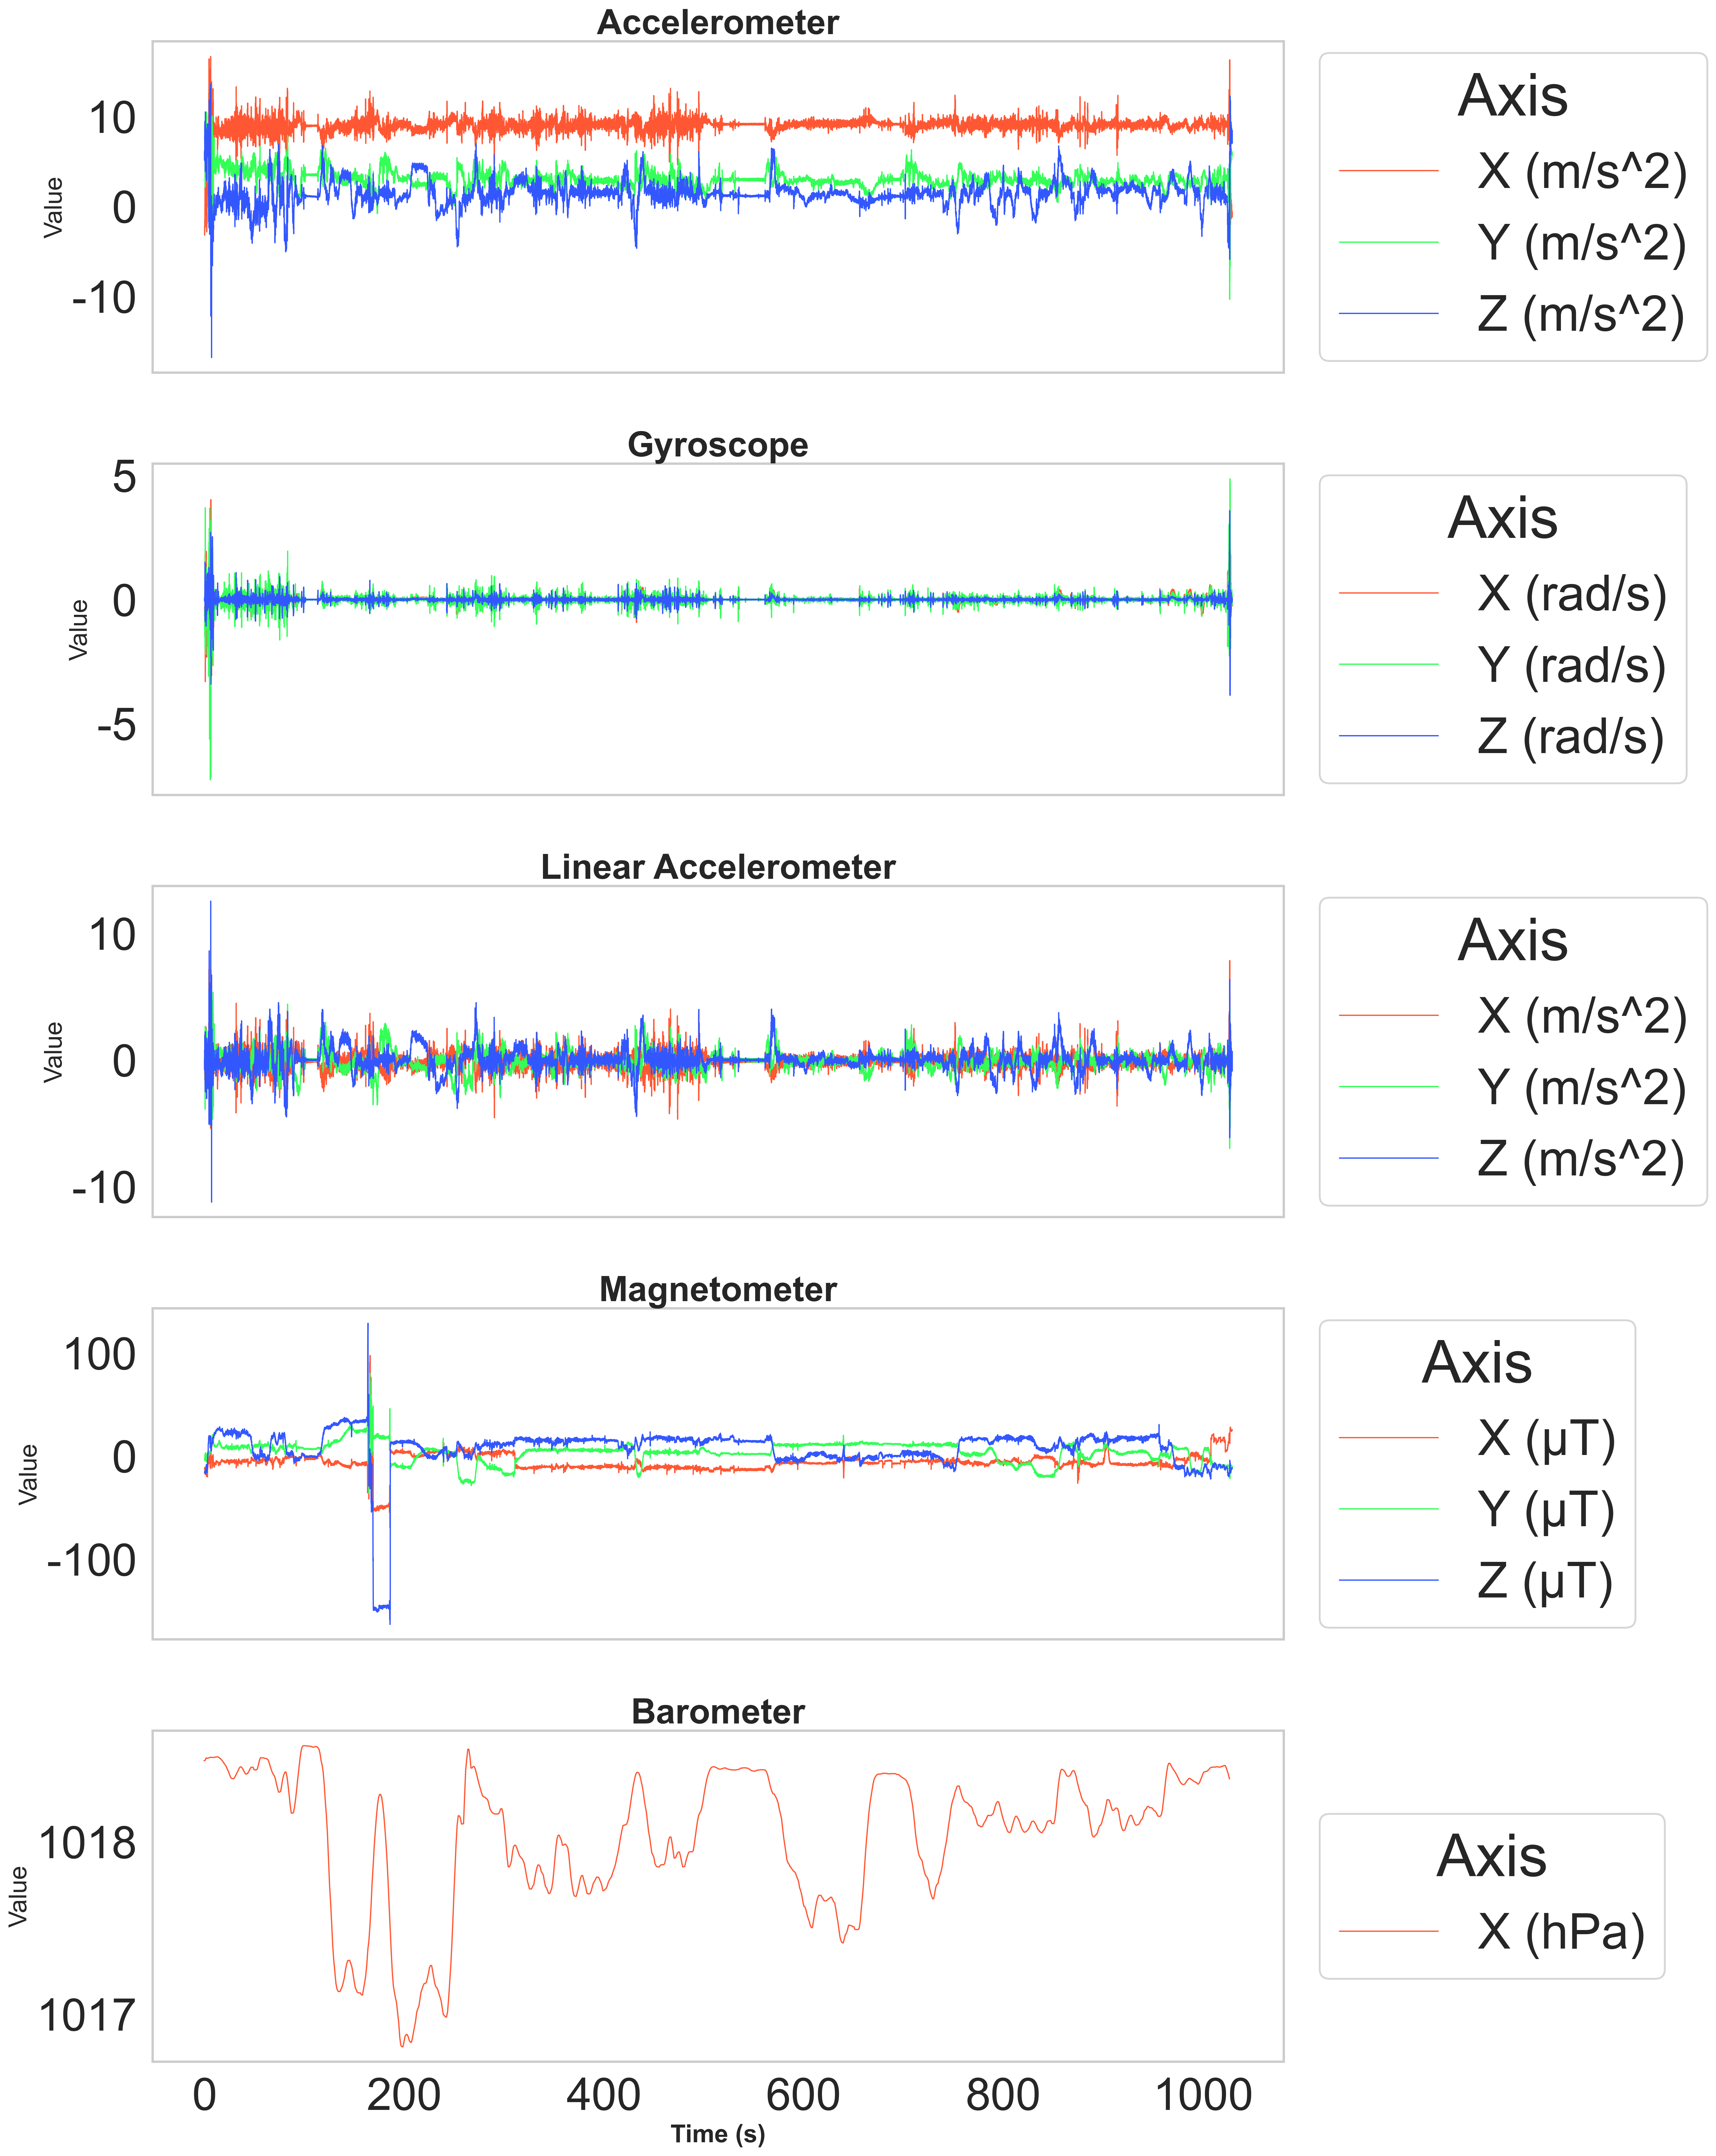

In [13]:
plot_sensor_data(sensor_data_dict_auto_2)

In [14]:
rennen_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Accelerometer.csv")
rennen_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Barometer.csv")
rennen_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Gyroscope.csv")
rennen_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Linear Accelerometer.csv")
rennen_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Location.csv")
rennen_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Magnetometer.csv")
rennen_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Proximity.csv")

In [15]:
sensor_data_dict_rennen_2 = {
    "Accelerometer": rennen_accelerometer_df_2,
    "Gyroscope": rennen_gyroscope_df_2,
    "Linear Accelerometer": rennen_linear_accelerometer_df_2,
    "Magnetometer": rennen_magnetometer_df_2,
    "Barometer": rennen_barometer_df_2,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

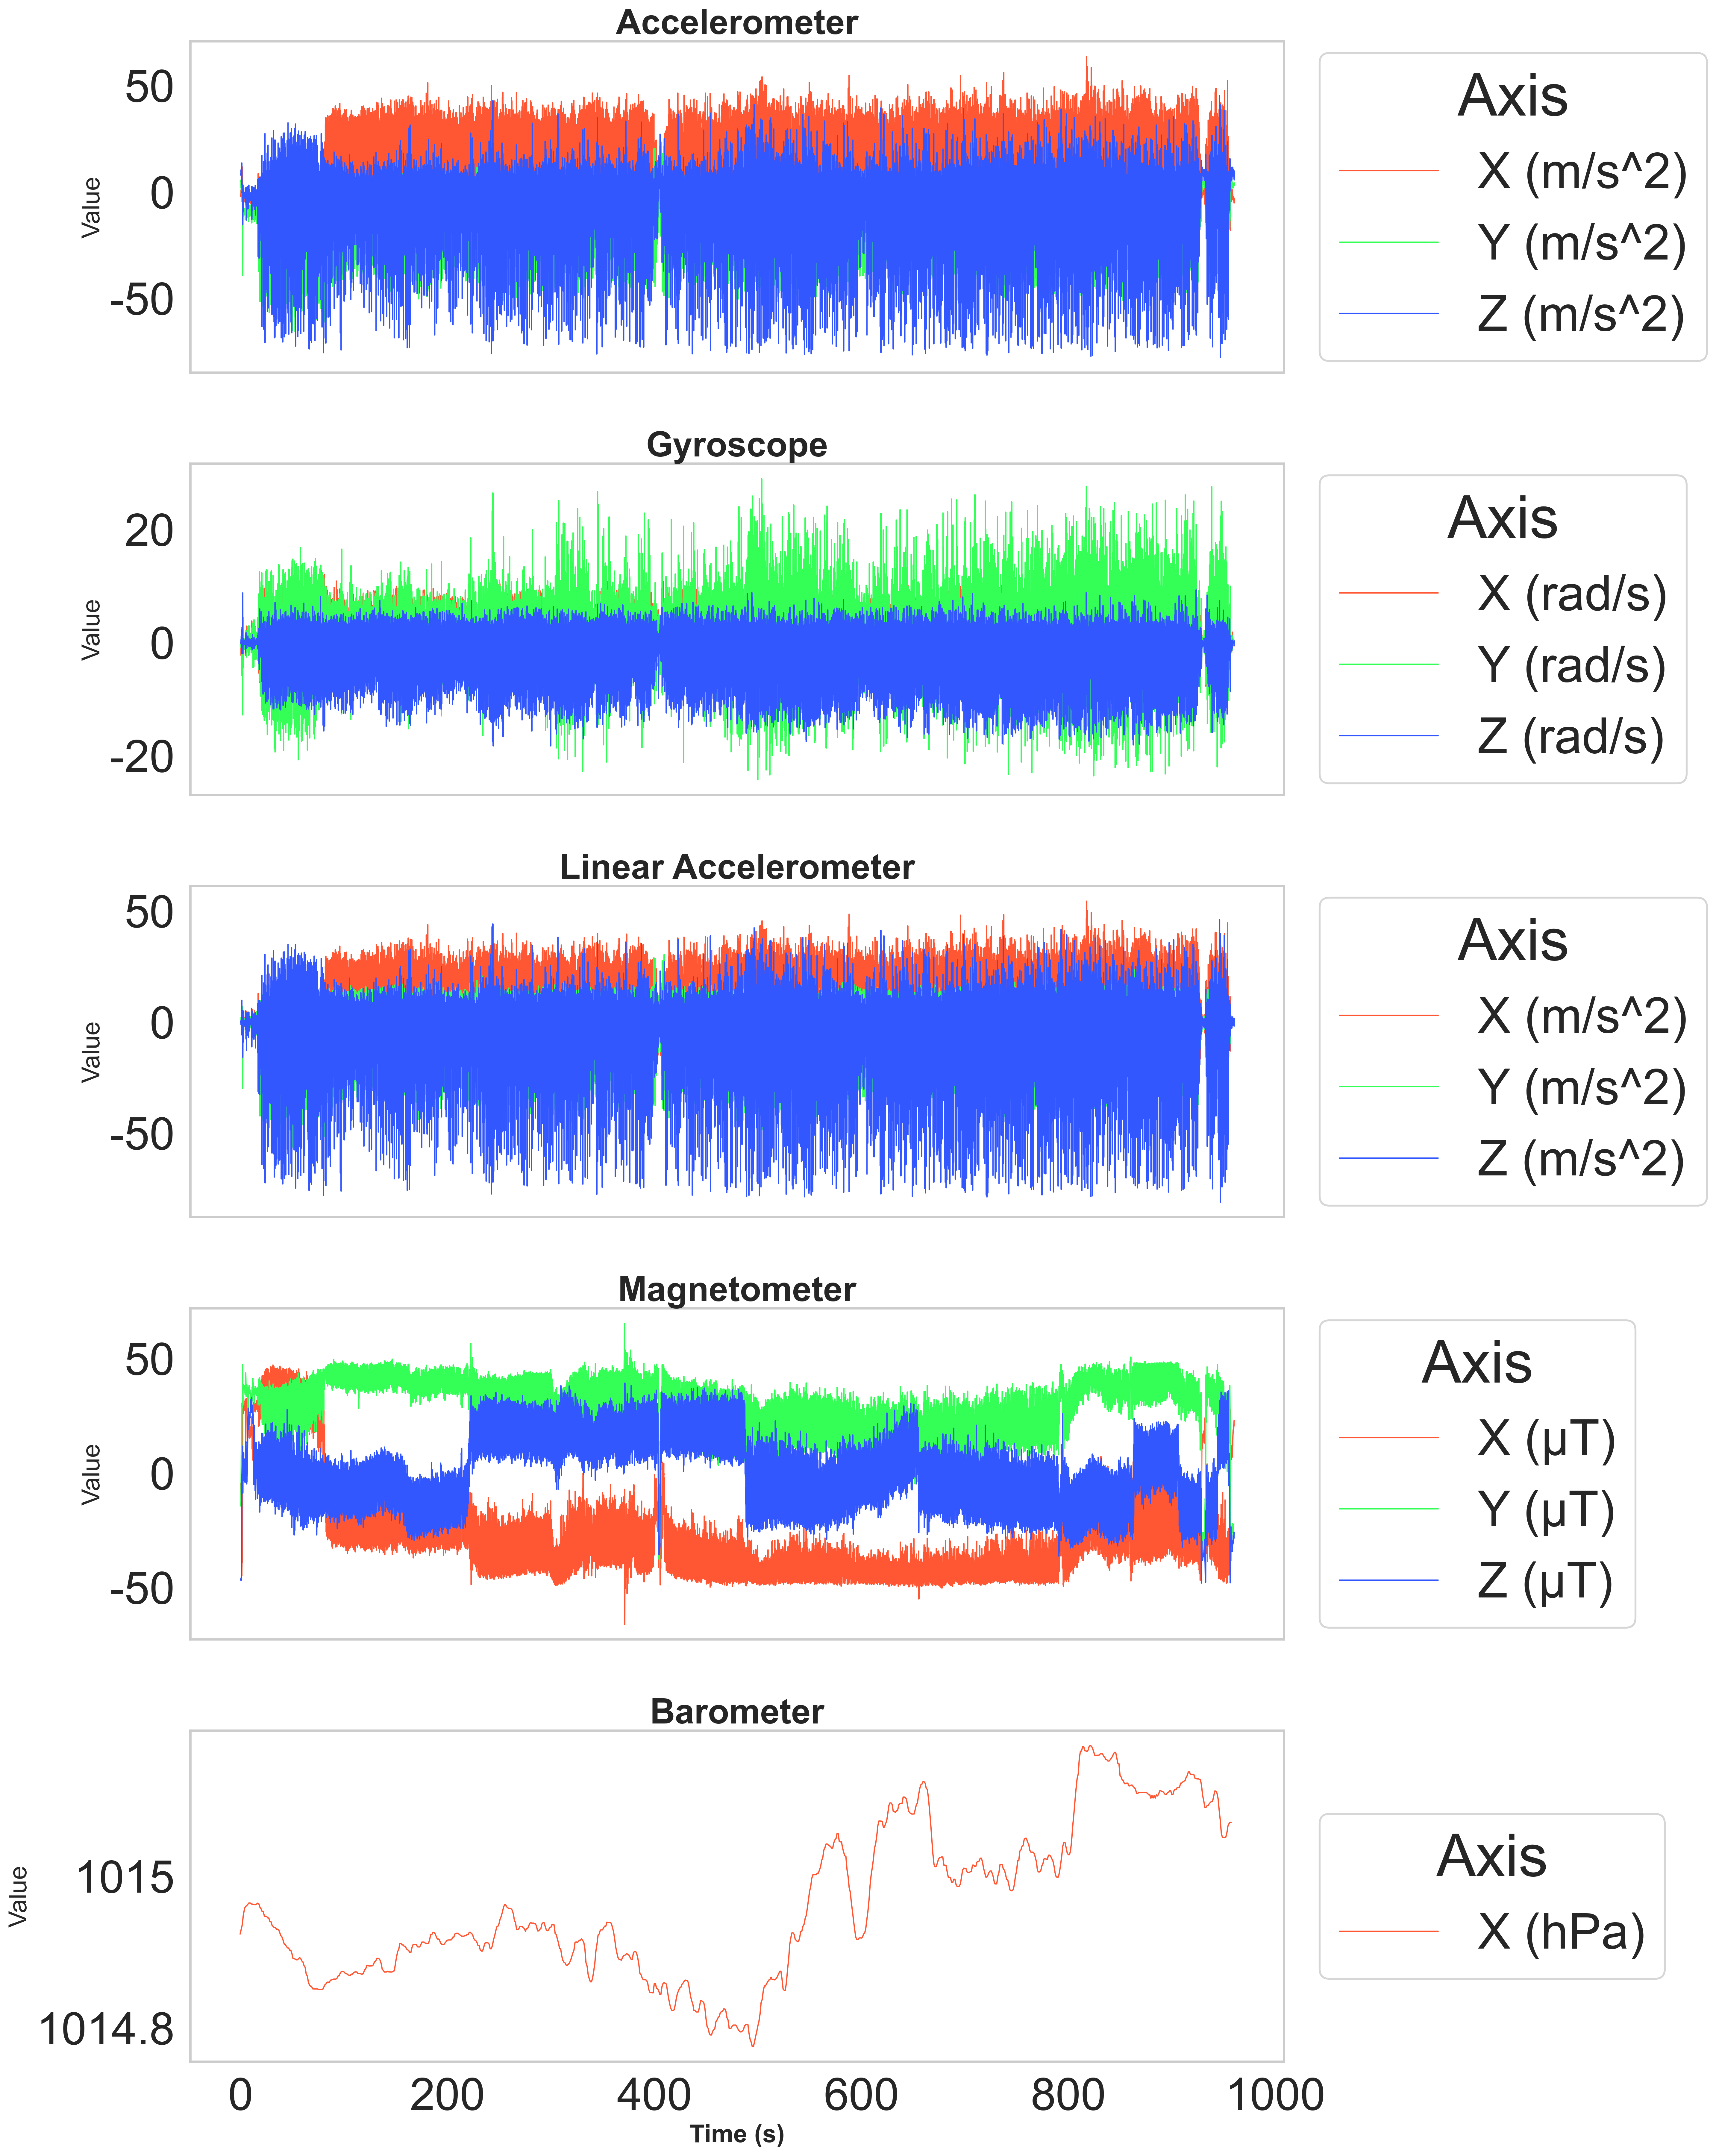

In [16]:
plot_sensor_data(sensor_data_dict_rennen_2)

In [17]:
trein_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_joris\Accelerometer.csv")
trein_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_joris\Barometer.csv")
trein_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_joris\Gyroscope.csv")
trein_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_joris\Linear Accelerometer.csv")
trein_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_joris\Location.csv")
trein_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_joris\Magnetometer.csv")
trein_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_joris\Proximity.csv")

In [18]:
sensor_data_dict_trein_2 = {
    "Accelerometer": trein_accelerometer_df_2,
    "Gyroscope": trein_gyroscope_df_2,
    "Linear Accelerometer": trein_linear_accelerometer_df_2,
    "Magnetometer": trein_magnetometer_df_2,
    "Barometer": trein_barometer_df_2,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

Puck

In [19]:
ren_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Accelerometer.csv")
ren_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Barometer.csv")
ren_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Gyroscope.csv")
ren_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Linear Accelerometer.csv")
ren_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Location.csv")
ren_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Magnetometer.csv")
ren_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Proximity.csv")

In [20]:
sensor_data_dict_rennen = {
    "Accelerometer": ren_accelerometer_df,
    "Gyroscope": ren_gyroscope_df,
    "Linear Accelerometer": ren_linear_accelerometer_df,
    "Magnetometer": ren_magnetometer_df,
    "Barometer": ren_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}



In [21]:
# plot_sensor_data(sensor_data_dict_rennen)

In [22]:
fiets_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Accelerometer.csv")
fiets_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Barometer.csv")
fiets_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Gyroscope.csv")
fiets_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Linear Accelerometer.csv")
fiets_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Location.csv")
fiets_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Magnetometer.csv")
fiets_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Proximity.csv")


In [23]:
sensor_data_dict_fietsen = {
    "Accelerometer": fiets_accelerometer_df,
    "Gyroscope": fiets_gyroscope_df,
    "Linear Accelerometer": fiets_linear_accelerometer_df,
    "Magnetometer": fiets_magnetometer_df,
    "Barometer": fiets_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}




In [24]:
trein_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Accelerometer.csv")
trein_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Barometer.csv")
trein_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Gyroscope.csv")
trein_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Linear Accelerometer.csv")
trein_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Location.csv")
trein_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Magnetometer.csv")
trein_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Proximity.csv")

In [25]:
sensor_data_dict_trein = {
    "Accelerometer": trein_accelerometer_df,
    "Gyroscope": trein_gyroscope_df,
    "Linear Accelerometer": trein_linear_accelerometer_df,
    "Magnetometer": trein_magnetometer_df,
    "Barometer": trein_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

In [26]:
auto_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Accelerometer.csv")
auto_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Barometer.csv")
auto_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Gyroscope.csv")   
auto_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Linear Accelerometer.csv")
auto_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Location.csv")
auto_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Magnetometer.csv")
auto_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Proximity.csv")

In [27]:
sensor_data_dict_auto = {
    "Accelerometer": auto_accelerometer_df,
    "Gyroscope": auto_gyroscope_df,
    "Linear Accelerometer": auto_linear_accelerometer_df,
    "Magnetometer": auto_magnetometer_df,
    "Barometer": auto_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

In [28]:
metro_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Accelerometer.csv")
metro_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Barometer.csv")
metro_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Gyroscope.csv")
metro_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Linear Accelerometer.csv")
metro_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Location.csv")
metro_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Magnetometer.csv")
metro_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Proximity.csv")

In [29]:
sensor_data_dict_metro = {
    "Accelerometer": metro_accelerometer_df,
    "Gyroscope": metro_gyroscope_df,
    "Linear Accelerometer": metro_linear_accelerometer_df,
    "Magnetometer": metro_magnetometer_df,
    "Barometer": metro_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

In [30]:
# def create_summary_table(sensor_data_dict, mode_name):
#     summaries = []
#     for sensor_name, df in sensor_data_dict.items():
#         desc = df.describe().T[['mean', 'std', 'min', 'max', 'count']]
#         desc['sensor'] = sensor_name
#         desc['feature'] = desc.index
#         desc['mode'] = mode_name
#         summaries.append(desc.reset_index(drop=True))
    
#     summary_df = pd.concat(summaries, ignore_index=True)
#     summary_df = summary_df[['mode', 'sensor', 'feature', 'count', 'mean', 'std', 'min', 'max']]
#     return summary_df

# # Voorbeeld met meerdere modi
# summary_fietsen = create_summary_table(sensor_data_dict_fietsen, "Bike")
# summary_auto = create_summary_table(sensor_data_dict_auto, "Car")
# summary_runnen = create_summary_table(sensor_data_dict_rennen, "Running")
# summary_trein = create_summary_table(sensor_data_dict_trein, "Train")
# summary_metro = create_summary_table(sensor_data_dict, "Metro")

# # Alles combineren in één grote tabel
# combined_summary = pd.concat([summary_fietsen, summary_auto, summary_metro, summary_trein, summary_runnen], ignore_index=True)

# print(combined_summary.head())
# combined_summary.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\summary_sensor_data.csv", index=False)

### Creëeren dataset

In [31]:
from functools import reduce

In [32]:
def aggregate_sensor_data(sensor_data_dict):
    aggregated_dfs = []

    for name, df in sensor_data_dict.items():
        # Kolomnamen opschonen
        df.columns = [col.strip().strip('"') for col in df.columns]

        # Tijdkolom gebruiken
        time_col = df.columns[0]
        df['second'] = df[time_col].astype(float).astype(int)

        # Gemiddelde per seconde
        df_avg = df.groupby('second').mean().reset_index()

        # Hernoemen van kolommen
        df_avg = df_avg.rename(columns={col: f"{name}_{col}" for col in df_avg.columns if col != 'second'})
        aggregated_dfs.append(df_avg)

    # Merge alles op 'second'
    final_df = reduce(lambda left, right: pd.merge(left, right, on='second', how='outer'), aggregated_dfs)

    # Sorteren en opschonen
    final_df = final_df.sort_values('second').reset_index(drop=True)
    final_df = final_df.rename(columns={'second': 'Time (s)'})
    columns_to_drop = [col for col in final_df.columns if 'Time' in col and col != 'Time (s)']
    final_df = final_df.drop(columns=columns_to_drop)

    return final_df

In [33]:
final_df_metro = aggregate_sensor_data(sensor_data_dict_metro)
final_df_rennen = aggregate_sensor_data(sensor_data_dict_rennen)
final_df_fietsen = aggregate_sensor_data(sensor_data_dict_fietsen)
final_df_trein = aggregate_sensor_data(sensor_data_dict_trein)

final_df_auto_pre = aggregate_sensor_data(sensor_data_dict_auto)
final_df_auto = final_df_auto_pre[final_df_auto_pre['Time (s)'] > 120]

In [34]:
final_df_fietsen_2 = aggregate_sensor_data(sensor_data_dict_fietsen_2)
final_df_auto_2 = aggregate_sensor_data(sensor_data_dict_auto_2)
final_df_rennen_2 = aggregate_sensor_data(sensor_data_dict_rennen_2)
final_df_metro_2 = aggregate_sensor_data(sensor_data_dict_metro_2)
final_df_trein_2 = aggregate_sensor_data(sensor_data_dict_trein_2)

In [35]:
final_df_trein_2.isna().sum()

Time (s)                           0
Accelerometer_X (m/s^2)            0
Accelerometer_Y (m/s^2)            0
Accelerometer_Z (m/s^2)            0
Gyroscope_X (rad/s)                0
Gyroscope_Y (rad/s)                0
Gyroscope_Z (rad/s)                0
Linear Accelerometer_X (m/s^2)     0
Linear Accelerometer_Y (m/s^2)     0
Linear Accelerometer_Z (m/s^2)     0
Magnetometer_X (µT)                0
Magnetometer_Y (µT)                0
Magnetometer_Z (µT)                0
Barometer_X (hPa)                 62
dtype: int64

In [36]:
final_df_metro['Barometer_X (hPa)'] = final_df_metro['Barometer_X (hPa)'].interpolate(method='linear')
final_df_rennen['Barometer_X (hPa)'] = final_df_rennen['Barometer_X (hPa)'].interpolate(method='linear')
final_df_fietsen['Barometer_X (hPa)'] = final_df_fietsen['Barometer_X (hPa)'].interpolate(method='linear')
final_df_trein['Barometer_X (hPa)'] = final_df_trein['Barometer_X (hPa)'].interpolate(method='linear')
final_df_auto['Barometer_X (hPa)'] = final_df_auto['Barometer_X (hPa)'].interpolate(method='linear')

C:\Users\jdrij\AppData\Local\Temp\ipykernel_7696\2315315235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_auto['Barometer_X (hPa)'] = final_df_auto['Barometer_X (hPa)'].interpolate(method='linear')


In [37]:
final_df_fietsen_2['Barometer_X (hPa)'] = final_df_fietsen_2['Barometer_X (hPa)'].interpolate(method='linear')
final_df_auto_2['Barometer_X (hPa)'] = final_df_auto_2['Barometer_X (hPa)'].interpolate(method='linear')
final_df_rennen_2['Barometer_X (hPa)'] = final_df_rennen_2['Barometer_X (hPa)'].interpolate(method='linear')
final_df_metro_2['Barometer_X (hPa)'] = final_df_metro_2['Barometer_X (hPa)'].interpolate(method='linear')
final_df_trein_2['Barometer_X (hPa)'] = final_df_trein_2['Barometer_X (hPa)'].interpolate(method='linear')

In [38]:
final_df_metro = final_df_metro[(final_df_metro['Time (s)'] > 10) & (final_df_metro['Time (s)'] < final_df_metro['Time (s)'].max() - 10)]
final_df_rennen = final_df_rennen[(final_df_rennen['Time (s)'] > 10) & (final_df_rennen['Time (s)'] < final_df_rennen['Time (s)'].max() - 10)]
final_df_fietsen = final_df_fietsen[(final_df_fietsen['Time (s)'] > 10) & (final_df_fietsen['Time (s)'] < final_df_fietsen['Time (s)'].max() - 10)]
final_df_trein = final_df_trein[(final_df_trein['Time (s)'] > 10) & (final_df_trein['Time (s)'] < final_df_trein['Time (s)'].max() - 10)]
final_df_auto = final_df_auto[(final_df_auto['Time (s)'] > 10) & (final_df_auto['Time (s)'] < final_df_auto['Time (s)'].max() - 10)]

In [39]:
final_df_fietsen_2 = final_df_fietsen_2[(final_df_fietsen_2['Time (s)'] > 10) & (final_df_fietsen_2['Time (s)'] < final_df_fietsen_2['Time (s)'].max() - 10)]
final_df_auto_2 = final_df_auto_2[(final_df_auto_2['Time (s)'] > 10) & (final_df_auto_2['Time (s)'] < final_df_auto_2['Time (s)'].max() - 10)]
final_df_rennen_2 = final_df_rennen_2[(final_df_rennen_2['Time (s)'] > 10) & (final_df_rennen_2['Time (s)'] < final_df_rennen_2['Time (s)'].max() - 10)]
final_df_metro_2 = final_df_metro_2[(final_df_metro_2['Time (s)'] > 10) & (final_df_metro_2['Time (s)'] < final_df_metro_2['Time (s)'].max() - 10)]
final_df_trein_2 = final_df_trein_2[(final_df_trein_2['Time (s)'] > 10) & (final_df_trein_2['Time (s)'] < final_df_trein_2['Time (s)'].max() - 10)]

In [40]:
final_df_trein_2.isna().sum().sort_values(ascending=False)

Time (s)                          0
Accelerometer_X (m/s^2)           0
Accelerometer_Y (m/s^2)           0
Accelerometer_Z (m/s^2)           0
Gyroscope_X (rad/s)               0
Gyroscope_Y (rad/s)               0
Gyroscope_Z (rad/s)               0
Linear Accelerometer_X (m/s^2)    0
Linear Accelerometer_Y (m/s^2)    0
Linear Accelerometer_Z (m/s^2)    0
Magnetometer_X (µT)               0
Magnetometer_Y (µT)               0
Magnetometer_Z (µT)               0
Barometer_X (hPa)                 0
dtype: int64

In [41]:
sensor_columns = [
    'Accelerometer_X (m/s^2)', 'Accelerometer_Y (m/s^2)', 'Accelerometer_Z (m/s^2)',
    'Gyroscope_X (rad/s)', 'Gyroscope_Y (rad/s)', 'Gyroscope_Z (rad/s)',
    'Linear Accelerometer_X (m/s^2)', 'Linear Accelerometer_Y (m/s^2)', 'Linear Accelerometer_Z (m/s^2)',
    'Magnetometer_X (µT)', 'Magnetometer_Y (µT)', 'Magnetometer_Z (µT)',
    'Barometer_X (hPa)'
]

In [42]:
from remove_noise import apply_kalman_filter

In [43]:
def kalman_filter(df):
    for col in sensor_columns:
        if col in df.columns:
            df[f"{col}_kalman"] = apply_kalman_filter(df[col])
    # Alleen Kalman-kolommen + Time
    filtered_cols = ["Time (s)"] + [f"{col}_kalman" for col in sensor_columns if f"{col}_kalman" in df.columns]
    df_filtered = df[filtered_cols]
    return df_filtered

In [44]:
metro_copy = final_df_metro.copy()
trein_copy = final_df_trein.copy()
rennen_copy = final_df_rennen.copy()
fietsen_copy = final_df_fietsen.copy()
auto_copy = final_df_auto.copy()

In [45]:
metro2_copy = final_df_metro_2.copy()
trein2_copy = final_df_trein_2.copy()
rennen2_copy = final_df_rennen_2.copy()
fietsen2_copy = final_df_fietsen_2.copy()
auto2_copy = final_df_auto_2.copy()

In [46]:
metro_kalman = kalman_filter(metro_copy)
trein_kalman = kalman_filter(trein_copy)
rennen_kalman = kalman_filter(rennen_copy)
fietsen_kalman = kalman_filter(fietsen_copy)
auto_kalman = kalman_filter(auto_copy)

In [47]:
metro2_kalman = kalman_filter(metro2_copy)
trein2_kalman = kalman_filter(trein2_copy)
rennen2_kalman = kalman_filter(rennen2_copy)
fietsen2_kalman = kalman_filter(fietsen2_copy)
auto2_kalman = kalman_filter(auto2_copy)

In [48]:
metro2_kalman

Time (s)  Accelerometer_X (m/s^2)_kalman  Accelerometer_Y (m/s^2)_kalman  \
11         11                        7.575698                       -1.377415   
12         12                        7.566109                       -1.373220   
13         13                        7.570350                       -1.376209   
14         14                        7.569045                       -1.375240   
15         15                        7.567047                       -1.372861   
..        ...                             ...                             ...   
802       802                        7.847427                       -1.772083   
803       803                        7.904249                       -1.744034   
804       804                        7.942073                       -1.720831   
805       805                        7.982083                       -1.706534   
806       806                        8.010199                       -1.689795   

     Accelerometer_Z (m/s^2)_kalman  Gyroscope_X (rad/s)_kalman  \
11                        -6.031746                   -0.000261   
12                        -6.044264                   -0.000507   
13                        -6.037124                   -0.000139   
14                        -6.038503                   -0.000392   
15                        -6.043107                   -0.000476   
..                              ...                         ...   
802                       -5.588148                   -0.004935   
803                       -5.528597                   -0.004138   
804                       -5.488209                   -0.003093   
805                       -5.443464                   -0.000318   
806                       -5.409846                   -0.001298   

     Gyroscope_Y (rad/s)_kalman  Gyroscope_Z (rad/s)_kalman  \
11                    -0.005448                   -0.003923   
12                     0.001933                    0.000973   
13                     0.001917                    0.001074   
14                     0.000297                   -0.000014   
15                     0.000118                   -0.000032   
..                          ...                         ...   
802                   -0.000287                    0.001661   
803                   -0.001063                    0.000783   
804                   -0.000633                    0.000792   
805                    0.005329                    0.000523   
806                   -0.002495                   -0.002936   

     Linear Accelerometer_X (m/s^2)_kalman  \
11                               -0.078349   
12                               -0.054986   
13                               -0.044883   
14                               -0.039816   
15                               -0.035447   
..                                     ...   
802                               0.155060   
803                               0.195064   
804                               0.202560   
805                               0.190076   
806                               0.167623   

     Linear Accelerometer_Y (m/s^2)_kalman  \
11                                0.000485   
12                               -0.003499   
13                               -0.001492   
14                               -0.002281   
15                               -0.002181   
..                                     ...   
802                               0.049584   
803                               0.055973   
804                               0.057126   
805                               0.054662   
806                               0.052552   

     Linear Accelerometer_Z (m/s^2)_kalman  Magnetometer_X (µT)_kalman  \
11                               -0.051981                  -32.129057   
12                               -0.021964                  -33.675464   
13                               -0.008755                  -33.458020   
14                               -0.001447                  -32.2764

## Lagged features

In [49]:
def add_lagged_features(df, lags=[3, 5, 10]):
    """
    Voeg lagged statistical features toe:
    - std voor lags > 1
    - mean voor niet-gyroscoop features
    - sum voor gyroscoop features
    Kolomnamen met eenheden worden gestandaardiseerd.
    """
    rename_map = {
        "Accelerometer_X (m/s^2)_kalman": "Accelerometer_X",
        "Accelerometer_Y (m/s^2)_kalman": "Accelerometer_Y",
        "Accelerometer_Z (m/s^2)_kalman": "Accelerometer_Z",
        "Gyroscope_X (rad/s)_kalman": "Gyroscope_X",
        "Gyroscope_Y (rad/s)_kalman": "Gyroscope_Y",
        "Gyroscope_Z (rad/s)_kalman": "Gyroscope_Z",
        "Linear Accelerometer_X (m/s^2)_kalman": "Linear_Accelerometer_X",
        "Linear Accelerometer_Y (m/s^2)_kalman": "Linear_Accelerometer_Y",
        "Linear Accelerometer_Z (m/s^2)_kalman": "Linear_Accelerometer_Z",
        "Magnetometer_X (µT)_kalman": "Magnetometer_X",
        "Magnetometer_Y (µT)_kalman": "Magnetometer_Y",
        "Magnetometer_Z (µT)_kalman": "Magnetometer_Z",
        "Barometer_X (hPa)_kalman": "Barometer_X",
        "Time (s)": "Time"
    }


    # Kolomnamen opschonen en hernoemen
    df.columns = df.columns.str.strip()
    df = df.rename(columns=rename_map)

    gyroscope_cols = ["Gyroscope_X", "Gyroscope_Y", "Gyroscope_Z"]
    all_feature_cols = [col for col in rename_map.values() if not col.startswith('Time')]
    non_gyro_cols = [col for col in all_feature_cols if col not in gyroscope_cols]

    for col in all_feature_cols:
        if col not in df.columns:
            print(f"⚠️ Kolom '{col}' ontbreekt in DataFrame. Sla over.")
            continue

        for lag in lags:
            # Alleen std voor lag > 1
            if lag > 1:
                df[f"{col}_std_{lag}"] = df[col].rolling(window=lag).std()

            if col in non_gyro_cols:
                df[f"{col}_mean_{lag}"] = df[col].rolling(window=lag).mean()

            if col in gyroscope_cols:
                df[f"{col}_sum_{lag}"] = df[col].rolling(window=lag).sum()

    #df.dropna(inplace=True)
    return df

In [50]:
# def add_lagged_features_2(df, lags=[1, 3, 10]):
#     """
#     Voeg lagged statistical features toe:
#     - std voor lags > 1
#     - mean voor niet-gyroscoop features
#     - sum voor gyroscoop features
#     Kolomnamen met eenheden worden gestandaardiseerd.
#     """
#     rename_map = {
#         "Accelerometer_X (m/s^2)": "Accelerometer_X",
#         "Accelerometer_Y (m/s^2)": "Accelerometer_Y",
#         "Accelerometer_Z (m/s^2)": "Accelerometer_Z",
#         "Gyroscope_X (rad/s)": "Gyroscope_X",
#         "Gyroscope_Y (rad/s)": "Gyroscope_Y",
#         "Gyroscope_Z (rad/s)": "Gyroscope_Z",
#         "Linear Accelerometer_X (m/s^2)": "Linear Accelerometer_X",
#         "Linear Accelerometer_Y (m/s^2)": "Linear Accelerometer_Y",
#         "Linear Accelerometer_Z (m/s^2)": "Linear Accelerometer_Z",
#         "Magnetometer_X (µT)": "Magnetometer_X",
#         "Magnetometer_Y (µT)": "Magnetometer_Y",
#         "Magnetometer_Z (µT)": "Magnetometer_Z",
#         "Barometer_X (hPa)": "Barometer_X"
#     }

#     # Kolomnamen opschonen en hernoemen
#     df.columns = df.columns.str.strip()
#     df = df.rename(columns=rename_map)

#     gyroscope_cols = ["Gyroscope_X", "Gyroscope_Y", "Gyroscope_Z"]
#     all_feature_cols = [col for col in rename_map.values() if not col.startswith('Time')]
#     non_gyro_cols = [col for col in all_feature_cols if col not in gyroscope_cols]

#     for col in all_feature_cols:
#         if col not in df.columns:
#             print(f"⚠️ Kolom '{col}' ontbreekt in DataFrame. Sla over.")
#             continue

#         for lag in lags:
#             # Alleen std voor lag > 1
#             if lag > 1:
#                 df[f"{col}_std_{lag}"] = df[col].rolling(window=lag).std()

#             if col in non_gyro_cols:
#                 df[f"{col}_mean_{lag}"] = df[col].rolling(window=lag).mean()

#             if col in gyroscope_cols:
#                 df[f"{col}_sum_{lag}"] = df[col].rolling(window=lag).sum()

#     #df.dropna(inplace=True)
#     return df


In [51]:
metro = add_lagged_features(metro_kalman).iloc[9:]
rennen = add_lagged_features(rennen_kalman).iloc[9:]
fietsen = add_lagged_features(fietsen_kalman).iloc[9:]
trein = add_lagged_features(trein_kalman).iloc[9:]
auto = add_lagged_features(auto_kalman).iloc[9:]

In [52]:
fietsen2 = add_lagged_features(fietsen2_kalman).iloc[9:]
auto2 = add_lagged_features(auto2_kalman).iloc[9:]
rennen2 = add_lagged_features(rennen2_kalman).iloc[9:]
metro2 = add_lagged_features(metro2_kalman).iloc[9:]
trein2 = add_lagged_features(trein2_kalman).iloc[9:]

In [53]:
metro['acc_magnitude'] = np.sqrt(metro['Accelerometer_X']**2 + metro['Accelerometer_Y']**2 + metro['Accelerometer_Z']**2)
rennen['acc_magnitude'] = np.sqrt(rennen['Accelerometer_X']**2 + rennen['Accelerometer_Y']**2 + rennen['Accelerometer_Z']**2)
fietsen['acc_magnitude'] = np.sqrt(fietsen['Accelerometer_X']**2 + fietsen['Accelerometer_Y']**2 + fietsen['Accelerometer_Z']**2)
trein['acc_magnitude'] = np.sqrt(trein['Accelerometer_X']**2 + trein['Accelerometer_Y']**2 + trein['Accelerometer_Z']**2)
auto['acc_magnitude'] = np.sqrt(auto['Accelerometer_X']**2 + auto['Accelerometer_Y']**2 + auto['Accelerometer_Z']**2)

In [54]:
metro2['acc_magnitude'] = np.sqrt(metro2['Accelerometer_X']**2 + metro2['Accelerometer_Y']**2 + metro2['Accelerometer_Z']**2)
rennen2['acc_magnitude'] = np.sqrt(rennen2['Accelerometer_X']**2 + rennen2['Accelerometer_Y']**2 + rennen2['Accelerometer_Z']**2)
fietsen2['acc_magnitude'] = np.sqrt(fietsen2['Accelerometer_X']**2 + fietsen2['Accelerometer_Y']**2 + fietsen2['Accelerometer_Z']**2)
trein2['acc_magnitude'] = np.sqrt(trein2['Accelerometer_X']**2 + trein2['Accelerometer_Y']**2 + trein2['Accelerometer_Z']**2)
auto2['acc_magnitude'] = np.sqrt(auto2['Accelerometer_X']**2 + auto2['Accelerometer_Y']**2 + auto2['Accelerometer_Z']**2)

In [55]:
metro['Linear_acc_magnitude'] = np.sqrt(metro['Linear_Accelerometer_X']**2 + metro['Linear_Accelerometer_Y']**2 + metro['Linear_Accelerometer_Z']**2)
rennen['Linear_acc_magnitude'] = np.sqrt(rennen['Linear_Accelerometer_X']**2 + rennen['Linear_Accelerometer_Y']**2 + rennen['Linear_Accelerometer_Z']**2)
fietsen['Linear_acc_magnitude'] = np.sqrt(fietsen['Linear_Accelerometer_X']**2 + fietsen['Linear_Accelerometer_Y']**2 + fietsen['Linear_Accelerometer_Z']**2)
trein['Linear_acc_magnitude'] = np.sqrt(trein['Linear_Accelerometer_X']**2 + trein['Linear_Accelerometer_Y']**2 + trein['Linear_Accelerometer_Z']**2)
auto['Linear_acc_magnitude'] = np.sqrt(auto['Linear_Accelerometer_X']**2 + auto['Linear_Accelerometer_Y']**2 + auto['Linear_Accelerometer_Z']**2)

In [56]:
metro2['Linear_acc_magnitude'] = np.sqrt(metro2['Linear_Accelerometer_X']**2 + metro2['Linear_Accelerometer_Y']**2 + metro2['Linear_Accelerometer_Z']**2)
rennen2['Linear_acc_magnitude'] = np.sqrt(rennen2['Linear_Accelerometer_X']**2 + rennen2['Linear_Accelerometer_Y']**2 + rennen2['Linear_Accelerometer_Z']**2)
fietsen2['Linear_acc_magnitude'] = np.sqrt(fietsen2['Linear_Accelerometer_X']**2 + fietsen2['Linear_Accelerometer_Y']**2 + fietsen2['Linear_Accelerometer_Z']**2)       
trein2['Linear_acc_magnitude'] = np.sqrt(trein2['Linear_Accelerometer_X']**2 + trein2['Linear_Accelerometer_Y']**2 + trein2['Linear_Accelerometer_Z']**2)
auto2['Linear_acc_magnitude'] = np.sqrt(auto2['Linear_Accelerometer_X']**2 + auto2['Linear_Accelerometer_Y']**2 + auto2['Linear_Accelerometer_Z']**2)

In [57]:
metro2.isna().sum().sort_values(ascending=False)

Time                              0
Linear_Accelerometer_Y_mean_5     0
Magnetometer_X_std_3              0
Linear_Accelerometer_Z_mean_10    0
Linear_Accelerometer_Z_std_10     0
                                 ..
Accelerometer_Z_mean_5            0
Accelerometer_Z_std_5             0
Accelerometer_Z_mean_3            0
Accelerometer_Z_std_3             0
Linear_acc_magnitude              0
Length: 94, dtype: int64

Label

In [58]:
metro['transport_mode'] = 'metro'
rennen['transport_mode'] = 'rennen'
fietsen['transport_mode'] = 'fietsen'
trein['transport_mode'] = 'trein'
auto['transport_mode'] = 'auto'

In [59]:
fietsen2['transport_mode'] = 'fietsen'
auto2['transport_mode'] = 'auto'
rennen2['transport_mode'] = 'rennen'
metro2['transport_mode'] = 'metro'
trein2['transport_mode'] = 'trein'

In [60]:
print(len(fietsen['Time']))
print(len(auto['Time']))
print(len(rennen['Time']))
print(len(trein['Time']))
print(len(metro['Time']))

776
1141
1264
953
865


In [61]:
print(len(fietsen2['Time']))
print(len(auto2['Time']))
print(len(rennen2['Time']))
print(len(trein2['Time']))
print(len(metro2['Time']))

815
999
930
940
787


In [62]:
train_metro = metro.iloc[:776].copy()
train_rennen = rennen.iloc[:776].copy()
train_fietsen = fietsen.iloc[:776].copy()
train_trein = trein.iloc[:776].copy()
train_auto = auto.iloc[:776].copy()

In [63]:
print("Max Time (s) values for each DataFrame:")
print("train_rennen:", len(train_rennen["Time"]))
print("train_fietsen:", len(train_fietsen["Time"]))
print("train_trein:", len(train_trein["Time"]))
print("train_auto:", len(train_auto["Time"]))
print("train_metro:", len(train_metro["Time"]))

Max Time (s) values for each DataFrame:
train_rennen: 776
train_fietsen: 776
train_trein: 776
train_auto: 776
train_metro: 776


In [64]:
test_fietsen2 = fietsen2[:776].copy()
test_auto2 = auto2[:776].copy()
test_rennen2 = rennen2[:776].copy()
test_metro2 = metro2[:776].copy()
test_trein2 = trein2[:776].copy()

In [65]:
print("Max Time (s) values for each DataFrame:")
print("test_fietsen2:", len(test_fietsen2["Time"]))
print("test_auto2:", len(test_auto2["Time"]))
print("test_rennen2:", len(test_rennen2["Time"]))   
print("test_metro2:", len(test_metro2["Time"]))
print("test_trein2:", len(test_trein2["Time"]))

Max Time (s) values for each DataFrame:
test_fietsen2: 776
test_auto2: 776
test_rennen2: 776
test_metro2: 776
test_trein2: 776


Train/test 

In [66]:
train_df = pd.concat([train_metro, train_rennen, train_fietsen, train_trein, train_auto], ignore_index=True)

In [67]:
test_df = pd.concat([test_metro2, test_rennen2, test_fietsen2, test_trein2, test_auto2], ignore_index=True)

In [68]:
train_df.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\train_df.csv", index=False)
test_df.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\test_df.csv", index=False)

In [69]:
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)

# Verschillen vinden
only_in_train = train_columns - test_columns
only_in_test = test_columns - train_columns

print("Kolommen die alleen in train_df_all staan:", only_in_train)
print("Kolommen die alleen in test_df staan:", only_in_test)

Kolommen die alleen in train_df_all staan: set()
Kolommen die alleen in test_df staan: set()


In [70]:
# train_df.columns = train_df.columns.str.replace(' ', '_')
# test_df.columns = test_df.columns.str.replace(' ', '_')

In [71]:
from IPython.display import display, HTML

# Calculate missing values
missing_values = test_df.isna().sum().sort_values(ascending=False)

# Convert to DataFrame for better display
missing_df = missing_values.reset_index()
missing_df.columns = ['Feature', 'Missing Count']

# Display with scroll
display(HTML(missing_df.to_html(max_rows=20, notebook=True)))

### Models

Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Drop 'Time' and split features/labels
X_train_logreg = train_df.drop(columns=['transport_mode', 'Time'])
y_train_logreg = train_df['transport_mode']

X_test_logreg = test_df.drop(columns=['transport_mode', 'Time'])
y_test_logreg = test_df['transport_mode']

# Encode labels
logreg_label_encoder = LabelEncoder()
y_train_logreg_enc = logreg_label_encoder.fit_transform(y_train_logreg)
y_test_logreg_enc = logreg_label_encoder.transform(y_test_logreg)

# Normalize features
scaler_logreg = StandardScaler()
X_train_logreg_scaled = scaler_logreg.fit_transform(X_train_logreg)
X_test_logreg_scaled = scaler_logreg.transform(X_test_logreg)

# Train Logistic Regression
logreg_model = LogisticRegression(
    C=10,
    max_iter=500,
    penalty='l2',
    solver='lbfgs'
)

logreg_model.fit(X_train_logreg_scaled, y_train_logreg_enc)

# Predictions
y_pred_logreg = logreg_model.predict(X_test_logreg_scaled)

# Evaluation
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test_logreg_enc, y_pred_logreg, target_names=logreg_label_encoder.classes_))

accuracy_logreg = accuracy_score(y_test_logreg_enc, y_pred_logreg)
print("Accuracy:", round(accuracy_logreg * 100, 2), "%")


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

        auto       0.41      0.99      0.58       776
     fietsen       0.00      0.00      0.00       776
       metro       0.64      0.59      0.61       776
      rennen       1.00      0.92      0.96       776
       trein       0.00      0.00      0.00       776

    accuracy                           0.50      3880
   macro avg       0.41      0.50      0.43      3880
weighted avg       0.41      0.50      0.43      3880

Accuracy: 50.08 %


KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Drop 'Time' and split features/labels
X_train_knn = train_df.drop(columns=['transport_mode', 'Time'])
y_train_knn = train_df['transport_mode']

X_test_knn = test_df.drop(columns=['transport_mode', 'Time'])
y_test_knn = test_df['transport_mode']

# Encode labels
knn_label_encoder = LabelEncoder()
y_train_knn_enc = knn_label_encoder.fit_transform(y_train_knn)
y_test_knn_enc = knn_label_encoder.transform(y_test_knn)

# Normalize features
scaler = StandardScaler()
X_train_knn_scaled = scaler.fit_transform(X_train_knn)
X_test_knn_scaled = scaler.transform(X_test_knn)

# Train KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    p=1,
    weights='uniform'
)

knn_model.fit(X_train_knn_scaled, y_train_knn_enc)

# Predictions
y_pred_knn = knn_model.predict(X_test_knn_scaled)

# Evaluation
print("=== K-Nearest Neighbors Classification Report ===")
print(classification_report(y_test_knn_enc, y_pred_knn, target_names=knn_label_encoder.classes_))

accuracy_knn = accuracy_score(y_test_knn_enc, y_pred_knn)
print("Accuracy:", round(accuracy_knn * 100, 2), "%")

=== K-Nearest Neighbors Classification Report ===
              precision    recall  f1-score   support

        auto       0.54      0.99      0.70       776
     fietsen       0.00      0.00      0.00       776
       metro       0.66      0.52      0.58       776
      rennen       1.00      0.98      0.99       776
       trein       0.10      0.12      0.11       776

    accuracy                           0.52      3880
   macro avg       0.46      0.52      0.48      3880
weighted avg       0.46      0.52      0.48      3880

Accuracy: 52.29 %


XGBoost

In [74]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Features en labels splitsen
X_train_xgb = train_df.drop(columns=['transport_mode', 'Time'])  # drop Time en label
y_train_xgb = train_df['transport_mode']

X_test_xgb = test_df.drop(columns=['transport_mode', 'Time'])
y_test_xgb = test_df['transport_mode']

# Encode labels (strings → integers)
le_xgb = LabelEncoder()
y_train_enc_xgb = le_xgb.fit_transform(y_train_xgb)
y_test_enc_xgb = le_xgb.transform(y_test_xgb)

label_mapping_xgb = dict(zip(le_xgb.classes_, range(len(le_xgb.classes_))))
print("Label to integer mapping:", label_mapping_xgb)

# Model met opgegeven hyperparameters
model_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    colsample_bytree=1.0,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

# Train model
model_xgb.fit(X_train_xgb, y_train_enc_xgb)

# Voorspel op testset
y_pred_xgb = model_xgb.predict(X_test_xgb)

# Rapport
print(classification_report(y_test_enc_xgb, y_pred_xgb, target_names=le_xgb.classes_))



Label to integer mapping: {'auto': 0, 'fietsen': 1, 'metro': 2, 'rennen': 3, 'trein': 4}


c:\Users\jdrij\anaconda3\envs\condaenv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

        auto       0.55      1.00      0.71       776
     fietsen       0.00      0.00      0.00       776
       metro       0.70      1.00      0.83       776
      rennen       0.87      0.91      0.89       776
       trein       0.00      0.00      0.00       776

    accuracy                           0.58      3880
   macro avg       0.42      0.58      0.49      3880
weighted avg       0.42      0.58      0.49      3880



In [75]:
from sklearn.metrics import accuracy_score

# Accuracy
accuracy_xgb = accuracy_score(y_test_enc_xgb, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")


Accuracy: 0.5827


In [76]:
print("Train accuracy:", model_xgb.score(X_train_xgb, y_train_enc_xgb))

Train accuracy: 1.0


In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a DataFrame comparing actual vs predicted values
comparison_df_xgb = pd.DataFrame({
    'Actual': y_test_enc_xgb,
    'Predicted': y_pred_xgb
})

# Add readable label names
comparison_df_xgb['Actual_Label'] = le_xgb.inverse_transform(comparison_df_xgb['Actual'])
comparison_df_xgb['Predicted_Label'] = le_xgb.inverse_transform(comparison_df_xgb['Predicted'])

# Show a sample of comparisons
print("=== XGBoost Prediction Comparison ===")
print(comparison_df_xgb.head(10))

# Count correct predictions
correct_xgb = (comparison_df_xgb['Actual'] == comparison_df_xgb['Predicted']).sum()
total_xgb = len(comparison_df_xgb)
incorrect_xgb = total_xgb - correct_xgb
accuracy_xgb = accuracy_score(y_test_enc_xgb, y_pred_xgb)

# Summary
print(f"\nTotal predictions: {total_xgb}")
print(f"Correct predictions: {correct_xgb}")
print(f"Incorrect predictions: {incorrect_xgb}")
print(f"Accuracy: {accuracy_xgb:.4f}")

=== XGBoost Prediction Comparison ===
   Actual  Predicted Actual_Label Predicted_Label
0       2          2        metro           metro
1       2          2        metro           metro
2       2          2        metro           metro
3       2          2        metro           metro
4       2          2        metro           metro
5       2          2        metro           metro
6       2          2        metro           metro
7       2          2        metro           metro
8       2          2        metro           metro
9       2          2        metro           metro

Total predictions: 3880
Correct predictions: 2261
Incorrect predictions: 1619
Accuracy: 0.5827


Randomforest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Features en labels splitsen
X_train_rf = train_df.drop(columns=['transport_mode', 'Time'])
y_train_rf = train_df['transport_mode']

X_test_rf = test_df.drop(columns=['transport_mode', 'Time'])
y_test_rf = test_df['transport_mode']

# Encode labels (strings → integers)
rf_label_encoder = LabelEncoder()
y_train_rf_enc = rf_label_encoder.fit_transform(y_train_rf)
y_test_rf_enc = rf_label_encoder.transform(y_test_rf)

# Mapping afdrukken
rf_label_mapping = dict(zip(rf_label_encoder.classes_, range(len(rf_label_encoder.classes_))))
print("RandomForest - Label to integer mapping:", rf_label_mapping)

# Train het RandomForest model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

rf_model.fit(X_train_rf, y_train_rf_enc)

# Voorspellingen doen
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluatie
print("=== RandomForest Classification Report ===")
print(classification_report(y_test_rf_enc, y_pred_rf, target_names=rf_label_encoder.classes_))


RandomForest - Label to integer mapping: {'auto': 0, 'fietsen': 1, 'metro': 2, 'rennen': 3, 'trein': 4}
=== RandomForest Classification Report ===
              precision    recall  f1-score   support

        auto       0.52      1.00      0.68       776
     fietsen       0.00      0.00      0.00       776
       metro       0.53      0.98      0.69       776
      rennen       1.00      0.04      0.08       776
       trein       0.00      0.00      0.00       776

    accuracy                           0.40      3880
   macro avg       0.41      0.40      0.29      3880
weighted avg       0.41      0.40      0.29      3880



In [79]:
from sklearn.metrics import accuracy_score

# Accuracy
accuracy_rf = accuracy_score(y_test_rf_enc, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")


Accuracy: 0.4039


In [80]:
comparison_df = pd.DataFrame({
    'Actual': y_test_rf_enc,
    'Predicted': y_pred_rf
})

# Add the label names for readability
comparison_df['Actual_Label'] = rf_label_encoder.inverse_transform(comparison_df['Actual'])
comparison_df['Predicted_Label'] = rf_label_encoder.inverse_transform(comparison_df['Predicted'])

# Print the first few rows
print("=== Prediction Comparison ===")
print(comparison_df.head(10))

# Count correct and incorrect predictions
correct = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
total = len(comparison_df)
incorrect = total - correct
accuracy = accuracy_score(y_test_rf_enc, y_pred_rf)

# Print summary
print(f"\nTotal predictions: {total}")
print(f"Correct predictions: {correct}")
print(f"Incorrect predictions: {incorrect}")
print(f"Accuracy: {accuracy:.4f}")

=== Prediction Comparison ===
   Actual  Predicted Actual_Label Predicted_Label
0       2          2        metro           metro
1       2          2        metro           metro
2       2          2        metro           metro
3       2          2        metro           metro
4       2          2        metro           metro
5       2          2        metro           metro
6       2          2        metro           metro
7       2          2        metro           metro
8       2          2        metro           metro
9       2          2        metro           metro

Total predictions: 3880
Correct predictions: 1567
Incorrect predictions: 2313
Accuracy: 0.4039


Catboost

In [81]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Input/output preparation
catboost_features_train = train_df.drop(columns=['transport_mode', 'Time'])
catboost_labels_train = train_df['transport_mode']

catboost_features_test = test_df.drop(columns=['transport_mode', 'Time'])
catboost_labels_test = test_df['transport_mode']

# Encode target labels
catboost_label_encoder = LabelEncoder()
catboost_y_train = catboost_label_encoder.fit_transform(catboost_labels_train)
catboost_y_test = catboost_label_encoder.transform(catboost_labels_test)

# Label mapping
catboost_label_dict = dict(zip(catboost_label_encoder.classes_, range(len(catboost_label_encoder.classes_))))
print("CatBoost - Label to integer mapping:", catboost_label_dict)

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(
    verbose=0,
    random_state=42,
    iterations=300,
    learning_rate=0.1,
    depth=8,
    l2_leaf_reg=3
)
catboost_model.fit(catboost_features_train, catboost_y_train)

# Make predictions
catboost_predictions = catboost_model.predict(catboost_features_test)

# Evaluation
print("=== CatBoost Classification Report ===")
print(classification_report(catboost_y_test, catboost_predictions, target_names=catboost_label_encoder.classes_))


CatBoost - Label to integer mapping: {'auto': 0, 'fietsen': 1, 'metro': 2, 'rennen': 3, 'trein': 4}
=== CatBoost Classification Report ===
              precision    recall  f1-score   support

        auto       1.00      1.00      1.00       776
     fietsen       0.00      0.00      0.00       776
       metro       0.43      1.00      0.60       776
      rennen       1.00      0.87      0.93       776
       trein       0.00      0.00      0.00       776

    accuracy                           0.57      3880
   macro avg       0.48      0.57      0.51      3880
weighted avg       0.48      0.57      0.51      3880



In [82]:
# Accuracy
accuracy_catboost = accuracy_score(catboost_y_test, catboost_predictions)
print(f"Accuracy: {accuracy_catboost:.4f}")


Accuracy: 0.5747


In [83]:
feature_names = X_train_xgb.columns

# Haal de importances op
importances = model_xgb.feature_importances_

# Zet om naar DataFrame voor overzicht
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [84]:
importance_df[importance_df['Importance'] > 0]

Feature    Importance
91           acc_magnitude  1.924933e-01
80   Magnetometer_Z_mean_3  1.801153e-01
11          Magnetometer_Z  1.257031e-01
16  Accelerometer_X_mean_5  7.422420e-02
22  Accelerometer_Y_mean_5  6.127295e-02
..                     ...           ...
84  Magnetometer_Z_mean_10  1.530595e-05
89      Barometer_X_std_10  1.278839e-05
10          Magnetometer_Y  1.027922e-05
25   Accelerometer_Z_std_3  4.691648e-06
38       Gyroscope_Y_sum_3  9.403784e-07

[73 rows x 2 columns]

LSTM


In [85]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

In [86]:
# train_df_basic = train_df[train_df.columns[:11].tolist() + ['transport_mode', 'acc_magnitude', 'Linear_acc_magnitude']]
# test_df_basic = test_df[test_df.columns[:11].tolist() + ['transport_mode', 'acc_magnitude', 'Linear_acc_magnitude']]

# le_lstm = LabelEncoder()
# train_df_basic['label'] = le_lstm.fit_transform(train_df_basic['transport_mode'])
# test_df_basic['label'] = le_lstm.transform(test_df_basic['transport_mode'])

# # Optional: see the label mapping
# label_mapping = dict(zip(le_lstm.classes_, le_lstm.transform(le_lstm.classes_)))
# print(label_mapping)

# def create_sequences(df, feature_cols, label_col, window_size=10):
#     X, y = [], []
#     for i in range(len(df) - window_size):
#         seq_x = df[feature_cols].iloc[i:i+window_size].values
#         seq_y = df[label_col].iloc[i+window_size]
#         X.append(seq_x)
#         y.append(seq_y)
#     return np.array(X), np.array(y)

# feature_cols = train_df_basic.columns[:11].tolist()

# X_train_lstm, y_train_lstm = create_sequences(train_df_basic, feature_cols, 'label', window_size=10)
# X_test_lstm, y_test_lstm = create_sequences(test_df_basic, feature_cols, 'label', window_size=10)


# model_lstm = Sequential()
# model_lstm.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
# model_lstm.add(Dense(len(np.unique(y_train_lstm)), activation='softmax'))

# model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


In [87]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# --- Prepare Data ---
train_df_basic = train_df[train_df.columns[:11].tolist() + ['transport_mode', 'acc_magnitude', 'Linear_acc_magnitude']]
test_df_basic = test_df[test_df.columns[:11].tolist() + ['transport_mode', 'acc_magnitude', 'Linear_acc_magnitude']]

le_lstm = LabelEncoder()
train_df_basic['label'] = le_lstm.fit_transform(train_df_basic['transport_mode'])
test_df_basic['label'] = le_lstm.transform(test_df_basic['transport_mode'])

label_mapping = dict(zip(le_lstm.classes_, le_lstm.transform(le_lstm.classes_)))
print("Label mapping:", label_mapping)

def create_sequences(df, feature_cols, label_col, window_size=10):
    X, y = [], []
    for i in range(len(df) - window_size):
        seq_x = df[feature_cols].iloc[i:i+window_size].values
        seq_y = df[label_col].iloc[i+window_size]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

feature_cols = train_df_basic.columns[:11].tolist()

# Create sequences from full train and test sets
X_train_lstm_full, y_train_lstm_full = create_sequences(train_df_basic, feature_cols, 'label', window_size=10)
X_test_lstm, y_test_lstm = create_sequences(test_df_basic, feature_cols, 'label', window_size=10)

# --- Train/Validation Split ---
X_train_lstm = X_train_lstm_full[:int(len(X_train_lstm_full)*0.8)]
y_train_lstm = y_train_lstm_full[:int(len(y_train_lstm_full)*0.8)]

X_val_lstm = X_train_lstm_full[int(len(X_train_lstm_full)*0.8):]
y_val_lstm = y_train_lstm_full[int(len(y_train_lstm_full)*0.8):]

# --- Build Model Function ---
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# --- Train with Validation and EarlyStopping ---
model_lstm = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]), len(np.unique(y_train_lstm)))

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_lstm.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=[early_stop],
    verbose=2
)

# --- Retrain on Full Training Data (train + val) ---
model_final = create_lstm_model((X_train_lstm_full.shape[1], X_train_lstm_full.shape[2]), len(np.unique(y_train_lstm_full)))

model_final.fit(
    X_train_lstm_full, y_train_lstm_full,
    epochs=early_stop.stopped_epoch + 1,  # Use epochs same as early stopping
    batch_size=32,
    verbose=2
)

# --- Final Evaluation on Test Data ---
test_loss, test_acc = model_final.evaluate(X_test_lstm, y_test_lstm, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")



C:\Users\jdrij\AppData\Local\Temp\ipykernel_7696\2287428837.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_basic['label'] = le_lstm.fit_transform(train_df_basic['transport_mode'])
C:\Users\jdrij\AppData\Local\Temp\ipykernel_7696\2287428837.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_basic['label'] = le_lstm.transform(test_df_basic['transport_mode'])


Label mapping: {'auto': 0, 'fietsen': 1, 'metro': 2, 'rennen': 3, 'trein': 4}
Epoch 1/50


c:\Users\jdrij\anaconda3\envs\condaenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


97/97 - 3s - 29ms/step - accuracy: 0.7083 - loss: 1.0473 - val_accuracy: 0.0000e+00 - val_loss: 3.6808
Epoch 2/50
97/97 - 1s - 10ms/step - accuracy: 0.9922 - loss: 0.2367 - val_accuracy: 0.0000e+00 - val_loss: 5.3127
Epoch 3/50
97/97 - 1s - 6ms/step - accuracy: 0.9984 - loss: 0.0429 - val_accuracy: 0.0000e+00 - val_loss: 5.0051
Epoch 4/50
97/97 - 1s - 6ms/step - accuracy: 0.9977 - loss: 0.0357 - val_accuracy: 0.0000e+00 - val_loss: 6.3429
Epoch 5/50
97/97 - 1s - 6ms/step - accuracy: 0.9984 - loss: 0.0216 - val_accuracy: 0.0000e+00 - val_loss: 5.8410
Epoch 6/50
97/97 - 1s - 6ms/step - accuracy: 0.9974 - loss: 0.0241 - val_accuracy: 0.0000e+00 - val_loss: 5.8215
Epoch 1/6
121/121 - 2s - 20ms/step - accuracy: 0.6357 - loss: 1.0815
Epoch 2/6
121/121 - 1s - 6ms/step - accuracy: 0.9537 - loss: 0.2674
Epoch 3/6
121/121 - 1s - 4ms/step - accuracy: 0.9977 - loss: 0.0585
Epoch 4/6
121/121 - 1s - 5ms/step - accuracy: 0.9984 - loss: 0.0221
Epoch 5/6
121/121 - 1s - 4ms/step - accuracy: 0.9982 - los

In [89]:
# Predict the classes for X_test
y_pred_prob_lstm = model_final.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

# Compute and print accuracy
accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
print(f"Test Accuracy: {accuracy_lstm:.2%}")

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 32.89%
